In [2]:
import os
import numpy as np
import librosa as la
import madmom as mm

path = '../data/train/'

In [108]:
sid = 0

fn = '%s%06d.ogg'%(path,sid)
signals, sr = la.load(fn)
sig = np.array(signals)
sig.shape

(661560,)

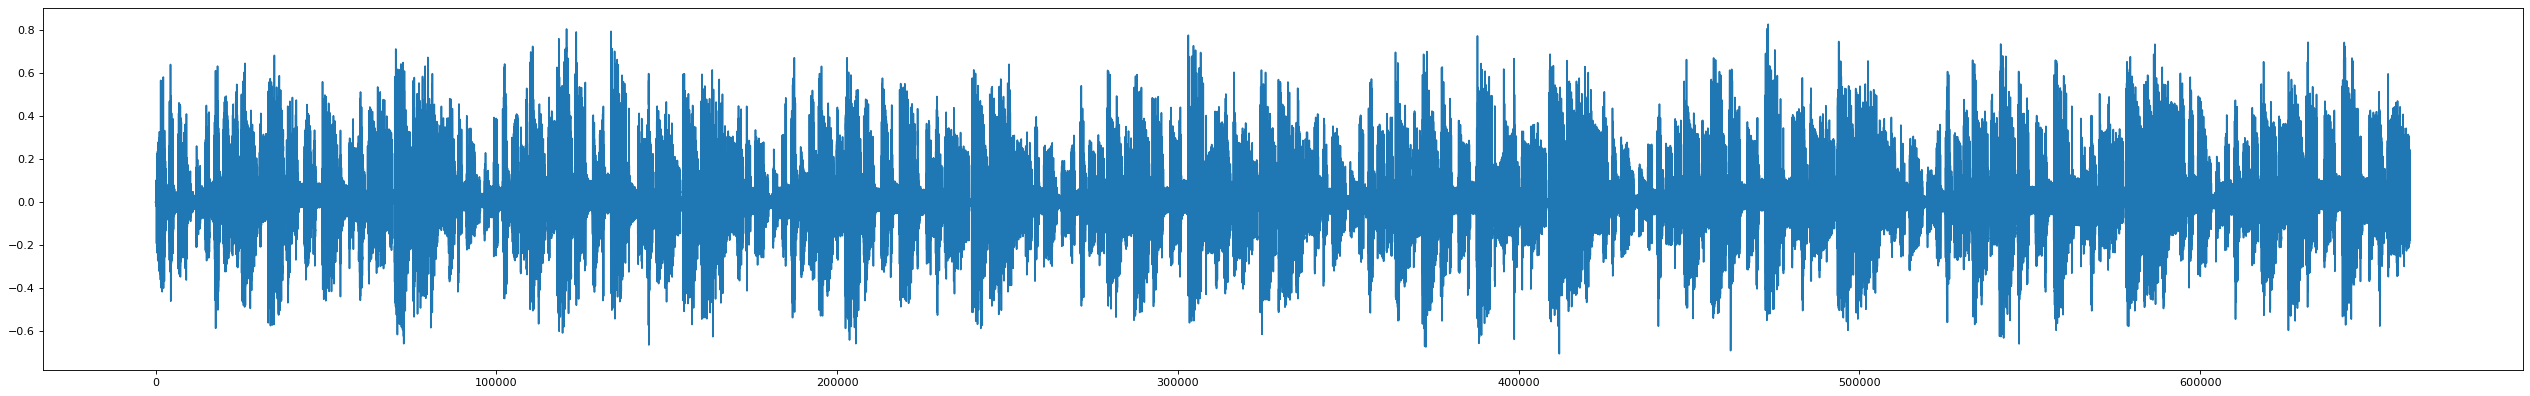

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40,6),dpi = 80)
plt.plot(sig)
plt.show()

# Beat
`tempo` represents the estimated lenght of a beat, should be contained

In [110]:
tempo, beat_frames = la.beat.beat_track(y=signals, sr=sr)
print(beat_frames)
tempo

[   4   35   61   87  118  149  180  211  242  273  304  335  366  397
  428  459  490  521  552  583  614  645  676  707  738  769  800  831
  862  893  924  955  986 1017 1048 1079 1110 1141 1172 1203]


166.70866935483872

# stft
Not quite understand. Just use the first 20 values of each channel

12 x 20 ==>  240 features

In [113]:
stft = la.feature.chroma_stft(y=signals, sr=sr, n_fft = 8)
stft = stft[:][:20]
stft.flatten()

array([0.9727604 , 1.        , 1.        , ..., 0.99658686, 0.9963093 ,
       0.99608415], dtype=float32)

# Estimate Tunning

In [114]:
tunning = la.estimate_tuning(y = signals)
tunning

0.0

# Zero-Crossing rate

In [115]:
zc = la.zero_crossings(y = signals)
zcr = len(zc[zc])/len(zc)
zcr

0.03890047765886692

# rms, mfcc, flatness, centroid
std, mean, max, min

3 x 4 + 20 x 4 ==>  92 features

In [116]:
rms = la.feature.rms(y = signals)
mc = la.feature.mfcc(y = signals)
centroid = la.feature.spectral_centroid(y = signals)
flat = la.feature.spectral_flatness(y = signals)
print(rms.shape, mc.shape, centroid.shape, flat.shape)


(1, 1293) (20, 1293) (1, 1293) (1, 1293)


In [120]:
centroid[0].shape

(1293,)

# autocorrelation
170 features

(170,)

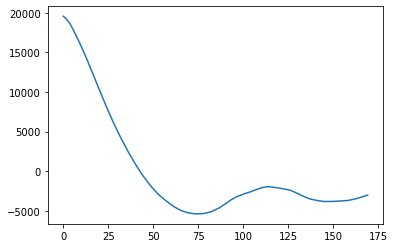

In [117]:
ac = la.autocorrelate(signals, max_size=170)
plt.plot(ac)
ac.shape

# harmonic & persuasive
\[rms, centroid, flatness\] * \[mean, std\] + beat + zero cross rate

2 x (3 x 2 + 1 + 1) ==> 16 features

In [119]:
yh,yp = la.effects.hpss(signals)


# Overall number of features
beat + stft + tunning + zero crassing rate + rms, mfcc, centroid, flatness + autocorrelation + harmonic & persuasive

= 1 + 240 + 1 + 1 + 92 + 170 + 16

= ` 521 `